In [1]:
import os
from email.parser import Parser
import email.utils
import time
import datetime
from dateutil.parser import parse

raw_inbox_data=[]
frequency_date = {}

path = 'C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/midterm/data/enron/maildir'
for filename in os.listdir(path):
    for x in os.listdir(path+'/'+filename):
        if (x=='calendar'):
            for y in os.listdir(path+'/'+filename+'/'+x):
                ab_path=path+'/'+filename+'/'+x+'/'+y
                try:
                    f = open(ab_path, "r")
                    string = f.read()
                    email = Parser().parsestr(string)
                    dt = parse(email['date'])
                    clean_mmyy=(dt.strftime('%m/%Y'))
                    if clean_mmyy not in frequency_date:  
                        frequency_date[clean_mmyy] = 1
                    else: frequency_date[clean_mmyy]+=1 
                except Exception:
                    pass        
                        
print(frequency_date)



{'06/2002': 4, '04/2002': 8, '10/2001': 245, '12/2001': 10, '05/2002': 3, '02/2002': 30, '06/2001': 256, '09/2001': 200, '01/2002': 69, '01/2001': 14, '03/2001': 51, '05/2001': 125, '07/2001': 216, '09/2002': 6, '11/2001': 61, '02/2001': 63, '03/2002': 2, '08/2001': 230, '04/2001': 62}


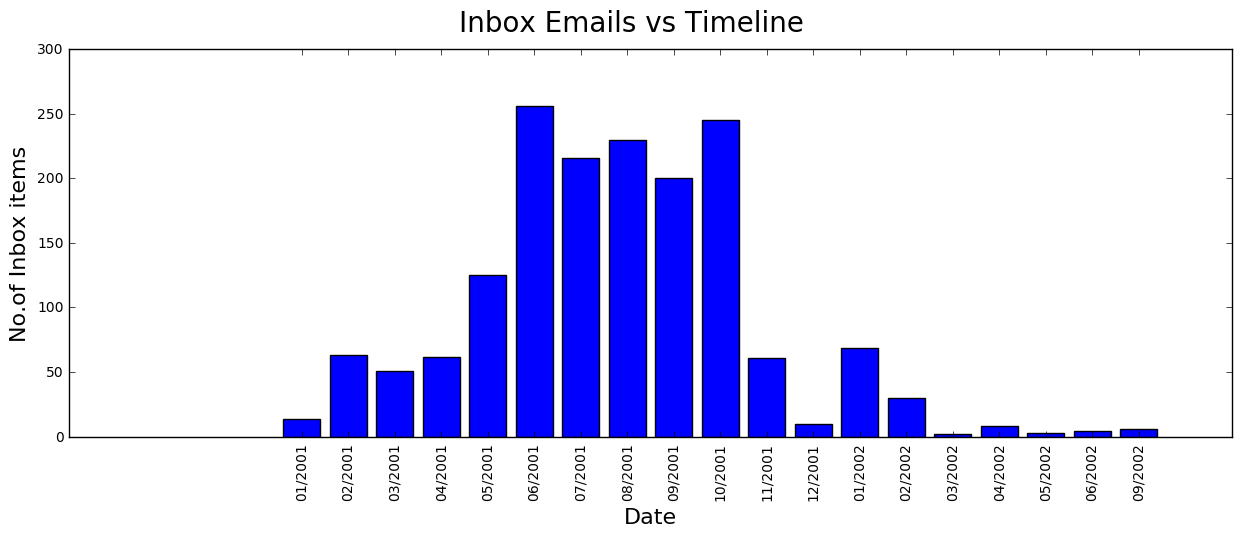

In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Inbox Emails vs Timeline', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('No.of Inbox items', fontsize=16)
plt.bar(range(len(frequency_date)), [v[1] for v in sorted(frequency_date.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))], align='center')
plt.xticks(range(len(frequency_date)), [v[0] for v in sorted(frequency_date.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))],rotation='vertical')

plt.show()